In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
ce_df=pd.read_csv("dataset\\ConsumerElectronics.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_22444\2569632200.py:1: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ce_df=pd.read_csv("dataset\\ConsumerElectronics.csv")


In [3]:
ce_df.head(2)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0


In [4]:
ce_df.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06
mean,2.015519e+03,6.585650e+00,2.842445e+15,1.375628e+16,1.022087e+00,5.687832e+00,4.108309e+03,5.403451e+00
std,4.996557e-01,3.623351e+00,1.269134e+15,5.594598e+16,2.535318e-01,2.983336e+00,8.510918e+03,5.346618e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602589e+15,1.606725e+15,1.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611825e+15,2.619185e+15,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610614e+15,4.397706e+15,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03


In [5]:
ce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [6]:
ce_df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [7]:
# Replace '\N' with NaN in the entire DataFrame
ce_df = ce_df.replace('\\N', pd.NA)

# Count NaN values in each column
nan_counts = ce_df.isna().sum()

# Filter to show only columns with NaN values and their counts
nan_counts = nan_counts[nan_counts > 0]

# Display the columns and their NaN counts
nan_counts


deliverybdays                1312972
deliverycdays                1312971
product_analytic_vertical       5828
dtype: int64

In [8]:
ce_df['deliverybdays'].value_counts()

4      62062
5      60594
3      53701
6      48655
2      37513
       ...  
-53        1
-40        1
-39        1
-41        1
135        1
Name: deliverybdays, Length: 142, dtype: int64

In [9]:
ce_df['product_analytic_vertical'].value_counts()

LaptopSpeaker        287850
MobileSpeaker        250250
AudioMP3Player       112892
PhysicalGame         105061
HomeAudioSpeaker      85607
                      ...  
ReflectorUmbrella         3
FlashShoeAdapter          2
KaraokePlayer             2
GameControlMount          1
Teleconverter             1
Name: product_analytic_vertical, Length: 73, dtype: int64

In [10]:
# Convert 'deliverybdays' and 'deliverycdays' to numeric
ce_df['deliverybdays'] = pd.to_numeric(ce_df['deliverybdays'], errors='coerce')
ce_df['deliverycdays'] = pd.to_numeric(ce_df['deliverycdays'], errors='coerce')

# Step 1: Remove negative values from 'deliverybdays' and 'deliverycdays'
ce_df = ce_df[(ce_df['deliverybdays'] >= 1) & (ce_df['deliverycdays'] >= 1)]

# Step 2: Filter columns with more than 1 unique value
columns_to_keep = ce_df.nunique()[ce_df.nunique() > 1].index
ce_df = ce_df[columns_to_keep]

# Display the filtered DataFrame
ce_df.shape

(333455, 19)

In [11]:
mode_value = ce_df['product_analytic_vertical'].mode()[0]
ce_df['product_analytic_vertical'] = ce_df['product_analytic_vertical'].fillna(mode_value)

In [12]:
# Check for columns with NaN values
nan_columns = ce_df.columns[ce_df.isna().any()].tolist()

# Display the columns with NaN values and their counts
nan_counts = ce_df[nan_columns].isna().sum()

# Print the columns with their NaN counts
print("Columns with NaN values:")
print(nan_counts[nan_counts > 0])


Columns with NaN values:
Series([], dtype: float64)


In [13]:
ce_df.shape

(333455, 19)

In [14]:
ce_df['order_date'] = pd.to_datetime(ce_df['order_date'])

In [15]:
# Find non-numeric values and convert them to NaN
ce_df["gmv"] = pd.to_numeric(ce_df["gmv"], errors='coerce')

# Check for rows with NaN in 'gmv'
non_numeric_gmv = ce_df[ce_df["gmv"].isna()]
print(non_numeric_gmv)

                   fsn_id          order_date  Year  Month     order_id  \
1359019  ACCDFZEJDWSQ8PVD 2015-07-01 19:15:45  2015      7  165411046.0   
1385672  ACCE32FMWSAZZ5AQ 2015-07-03 14:20:58  2015      7  166132158.0   

         order_item_id  gmv  units  deliverybdays  deliverycdays  \
1359019    210013291.0  NaN      1            1.0            1.0   
1385672    210848360.0  NaN      1            1.0            1.0   

        s1_fact.order_payment_type  sla cust_id pincode  \
1359019                    Prepaid    1                   
1385672                    Prepaid    2                   

        product_analytic_category product_analytic_sub_category  \
1359019        EntertainmentSmall                       Speaker   
1385672        EntertainmentSmall                     HomeAudio   

        product_analytic_vertical  product_mrp  product_procurement_sla  
1359019             LaptopSpeaker         1990                        3  
1385672          HomeAudioSpeaker        

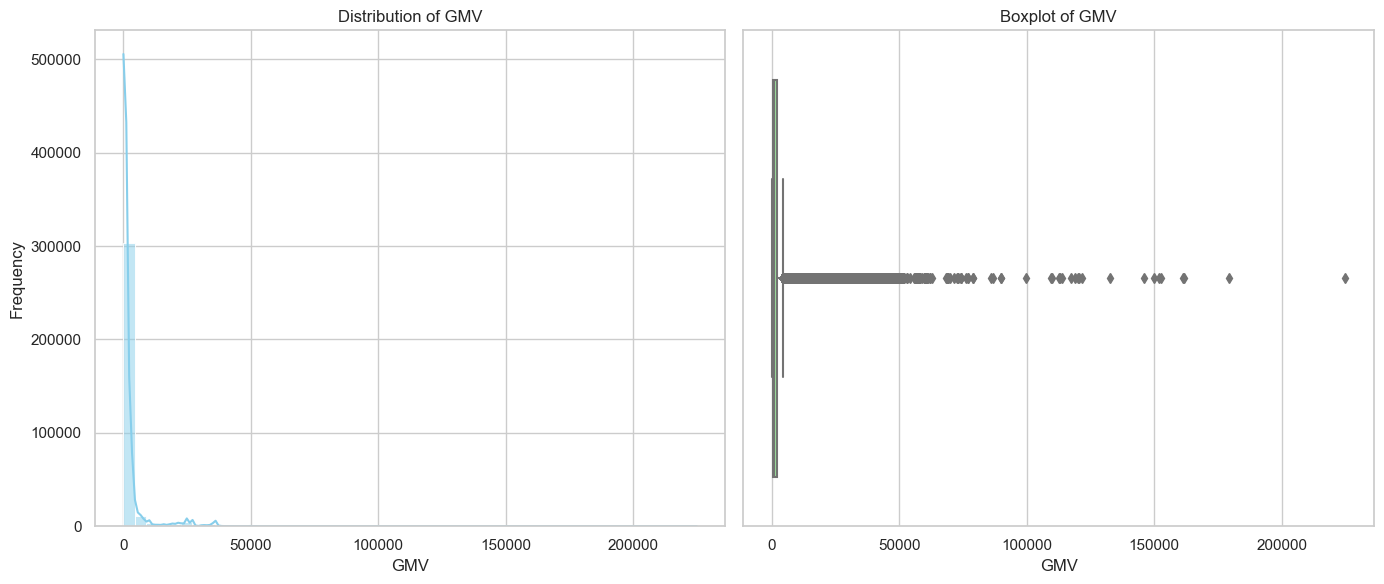

In [16]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the distribution of GMV
sns.histplot(ce_df['gmv'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of GMV')
axes[0].set_xlabel('GMV')
axes[0].set_ylabel('Frequency')

# Boxplot to visualize outliers
sns.boxplot(x=ce_df['gmv'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of GMV')
axes[1].set_xlabel('GMV')

# Show the plots
plt.tight_layout()
plt.show()

In [17]:
# Fill NaN values with the mean of the column
ce_df["gmv"].fillna(ce_df["gmv"].median(), inplace=True)

In [18]:
# Check for duplicates
duplicates = ce_df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows in ce_df: {num_duplicates}")

# Optional: If you want to see the duplicate rows themselves
duplicate_rows = ce_df[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Number of duplicate rows in ce_df: 50
Duplicate Rows:
                   fsn_id          order_date  Year  Month      order_id  \
944830   ACCDH7MFZJGRWJCW 2016-04-27 00:19:25  2016      4  3.575842e+15   
1033341  AVMDX6TFZZQM7SXJ 2016-04-27 00:43:52  2016      4  3.580256e+15   
1033407  AVMDX6TFZZQM7SXJ 2016-04-27 00:43:52  2016      4  3.580256e+15   
1033492  AVMDX6TFZZQM7SXJ 2016-04-27 00:43:52  2016      4  3.580256e+15   
1033640  AVMDX6TFZZQM7SXJ 2016-04-27 00:43:52  2016      4  3.580256e+15   
1047433  GAME5UVFVTCJQ95Z 2016-04-27 00:38:59  2016      4  1.566052e+15   
1047469  GAME5UVFVTCJQ95Z 2016-04-27 00:38:59  2016      4  1.566052e+15   
1047527  GAME5UVFVTCJQ95Z 2016-04-27 00:38:59  2016      4  1.566052e+15   
1047566  GAME5UVFVTCJQ95Z 2016-04-27 00:38:59  2016      4  1.566052e+15   
1049284  GAME8YF95UHRMV2G 2016-04-27 01:04:32  2016      4  1.566068e+15   
1049374  GAME8YF95UHRMV2G 2016-04-27 01:04:32  2016      4  1.566068e+15   
1049558  GAME8YF95UHRMV2G 2016-04-

In [19]:
ce_df = ce_df.drop_duplicates()
print(f"New shape of DataFrame after removing duplicates: {ce_df.shape}")

New shape of DataFrame after removing duplicates: (333405, 19)


In [20]:
ce_df.head(2)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
706,ACCCX3SU22JG8NJX,2015-10-26 13:06:37,2015,10,3.419100e+15,3.419100e+15,470.0,1,5.0,6.0,Prepaid,7,9.08246875057758E+018,-7.82411064429225E+018,CameraAccessory,CameraAccessory,CameraBattery,1545,1
9726,ACCDF2Z7KXGSZEP7,2016-02-03 14:39:53,2016,2,4.415891e+15,4.415891e+15,384.0,1,5.0,6.0,Prepaid,6,-5.50337769581818E+017,-8.03408849241778E+018,GamingHardware,GamingAccessory,GamePad,350,3


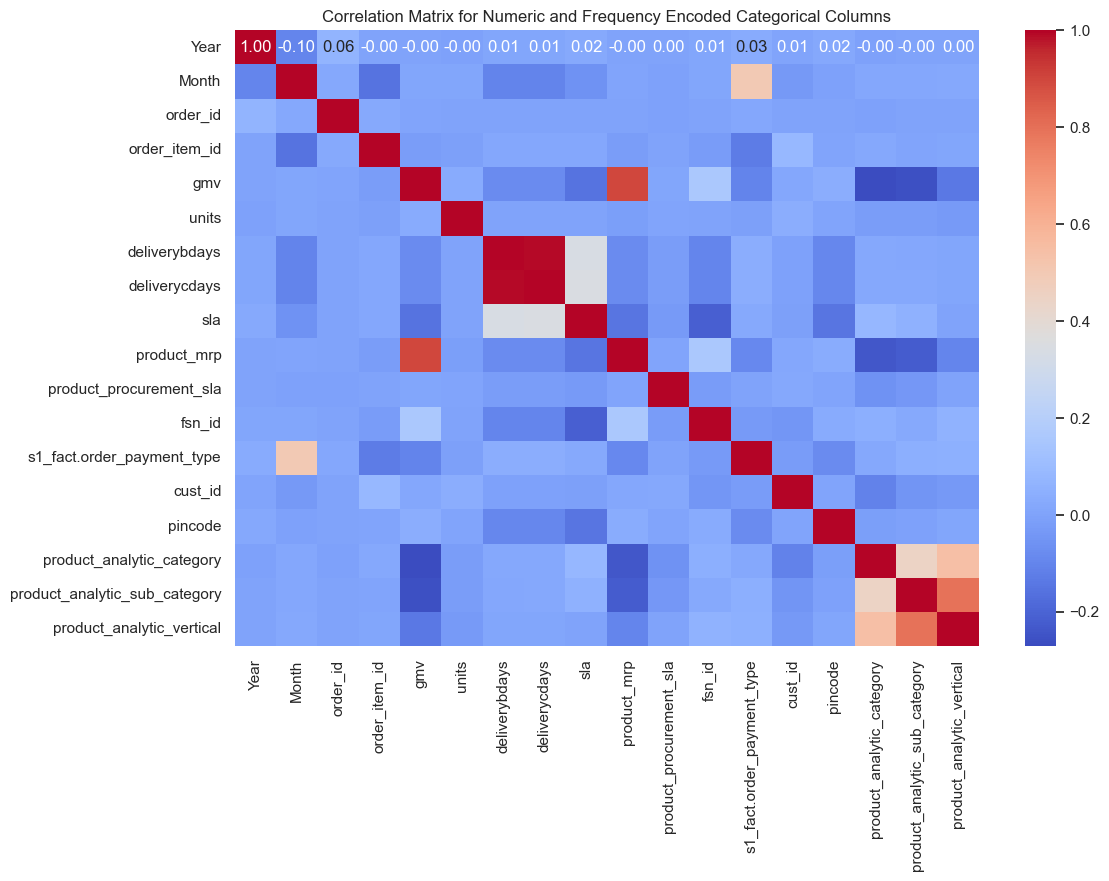

Correlation with GMV:
gmv                              1.000000
product_mrp                      0.897089
fsn_id                           0.156701
pincode                          0.039978
units                            0.027492
cust_id                          0.015764
product_procurement_sla          0.008044
Month                            0.007071
order_id                         0.002441
Year                            -0.001777
order_item_id                   -0.021526
deliverybdays                   -0.081493
deliverycdays                   -0.081590
s1_fact.order_payment_type      -0.102598
product_analytic_vertical       -0.137692
sla                             -0.155339
product_analytic_sub_category   -0.256578
product_analytic_category       -0.271085
Name: gmv, dtype: float64


In [21]:
numeric_df = ce_df.select_dtypes(include=['int64', 'float64'])
categorical_df = ce_df.select_dtypes(include=['object'])

# Step 1: Frequency Encoding for Categorical Columns
for col in categorical_df.columns:
    freq_encoding = categorical_df[col].value_counts(normalize=True)
    categorical_df[col] = categorical_df[col].map(freq_encoding)

# Step 2: Combine with Numeric Data
combined_df = pd.concat([numeric_df, categorical_df], axis=1)

# Step 3: Calculate the correlation matrix for the combined DataFrame
correlation_matrix = combined_df.corr()

# Step 4: Plot the correlation heatmap for combined DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numeric and Frequency Encoded Categorical Columns')
plt.show()

# Step 5: If you want to see correlations specifically with 'gmv'
gmv_correlation = correlation_matrix['gmv'].sort_values(ascending=False)
print("Correlation with GMV:")
print(gmv_correlation)

In [22]:
# List of columns to remove
columns_to_remove = [
    'fsn_id',
    'pincode',
    'units',
    'cust_id',
    'product_procurement_sla',
    'Month',
    'order_id'
]

# Drop the columns from the DataFrame
ce_df = ce_df.drop(columns=columns_to_remove)

# Verify the remaining columns
print(ce_df.columns)


Index(['order_date', 'Year', 'order_item_id', 'gmv', 'deliverybdays',
       'deliverycdays', 's1_fact.order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp'],
      dtype='object')


In [23]:
ce_df.shape

(333405, 12)

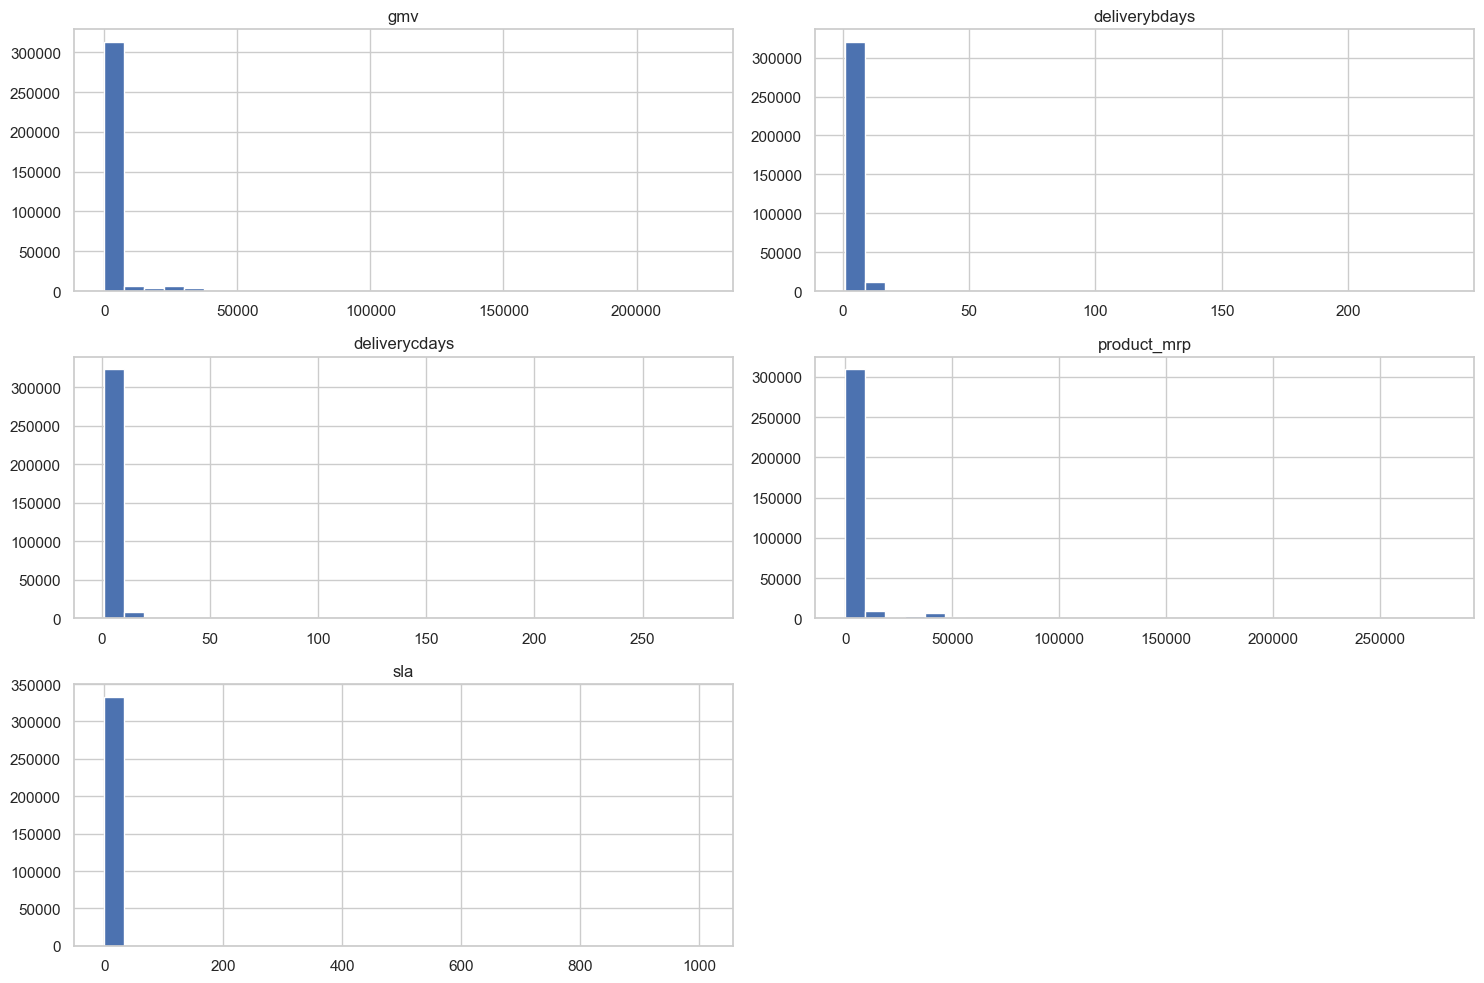

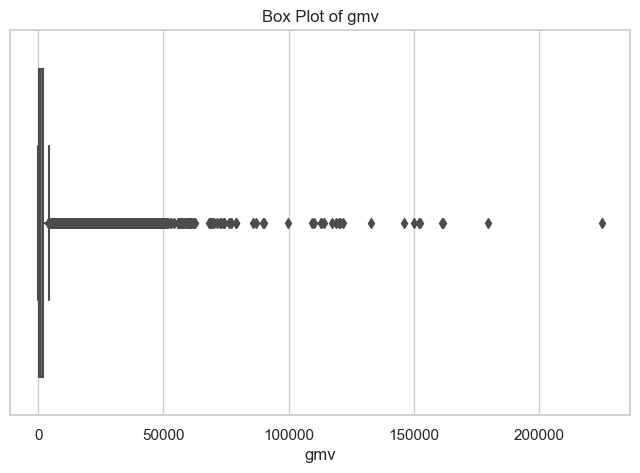

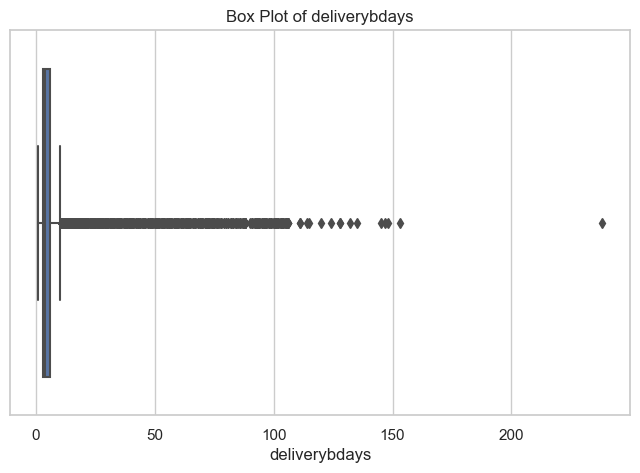

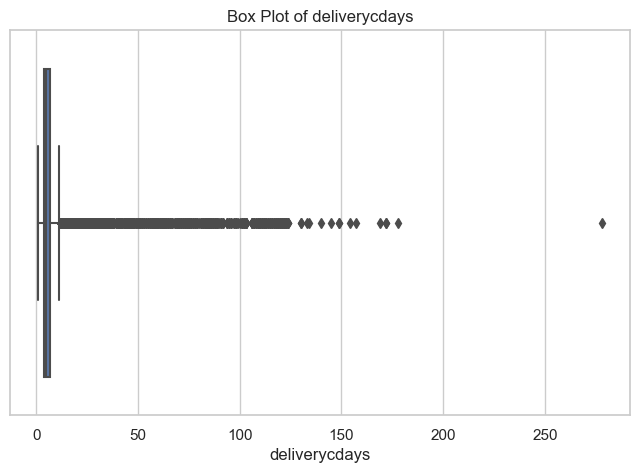

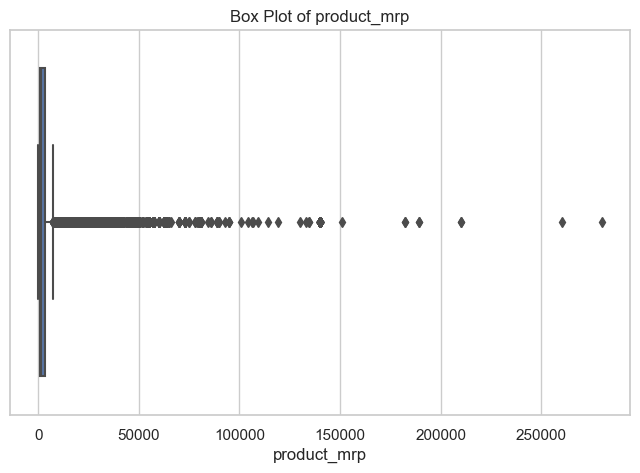

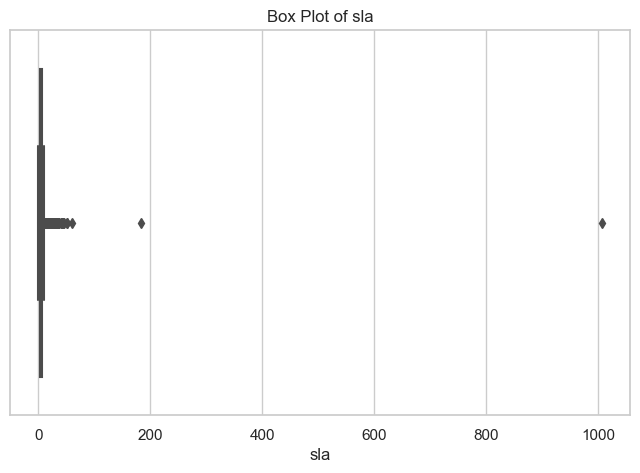

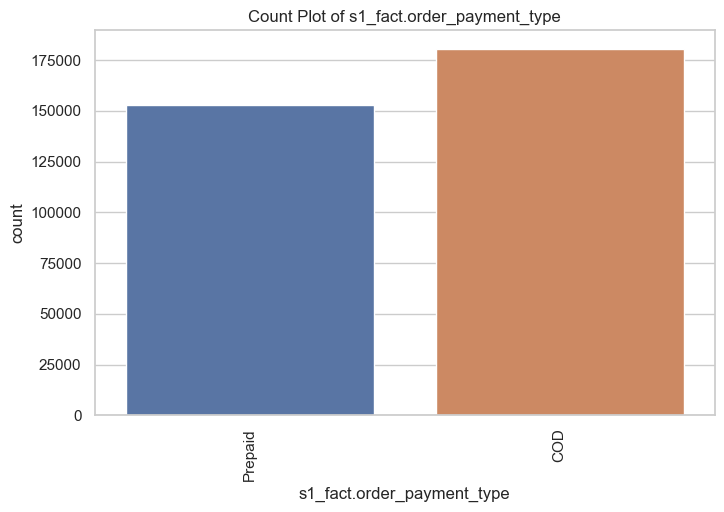

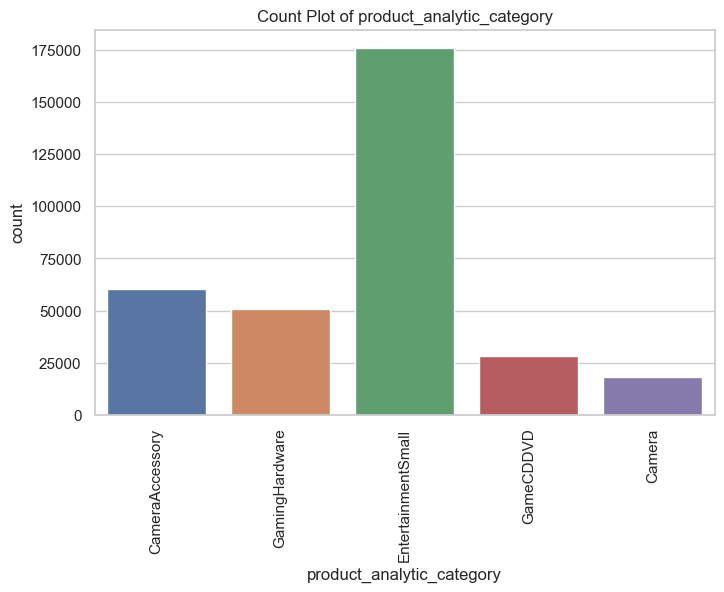

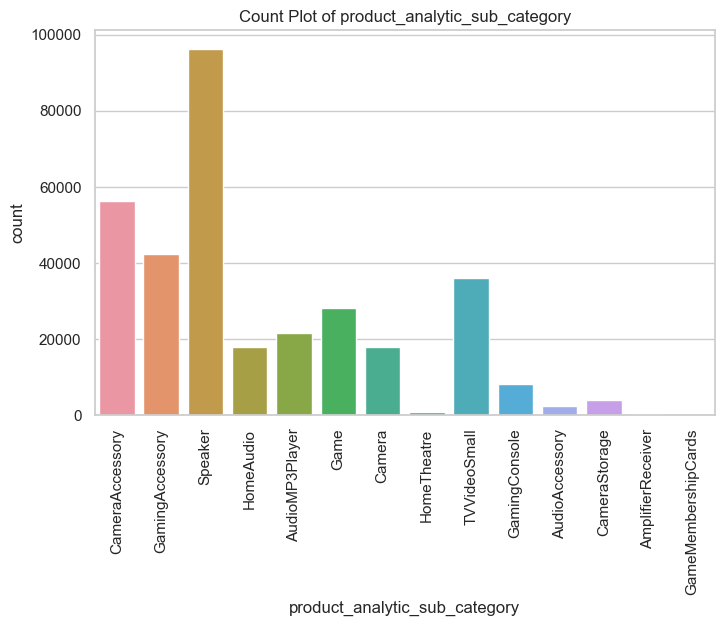

In [24]:
# Univariate Analysis
# Numeric Columns
numeric_columns = ['gmv', 'deliverybdays', 'deliverycdays', 'product_mrp', 'sla']

# Histograms
ce_df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box Plots
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, data=ce_df)
    plt.title(f'Box Plot of {col}')
    plt.show()

# Categorical Columns
categorical_columns = ['s1_fact.order_payment_type', 'product_analytic_category', 'product_analytic_sub_category']

# Count Plots
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=ce_df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=90)
    plt.show()

Unsupported data types for the specified columns: order_date and gmv.


<Figure size 1500x500 with 0 Axes>

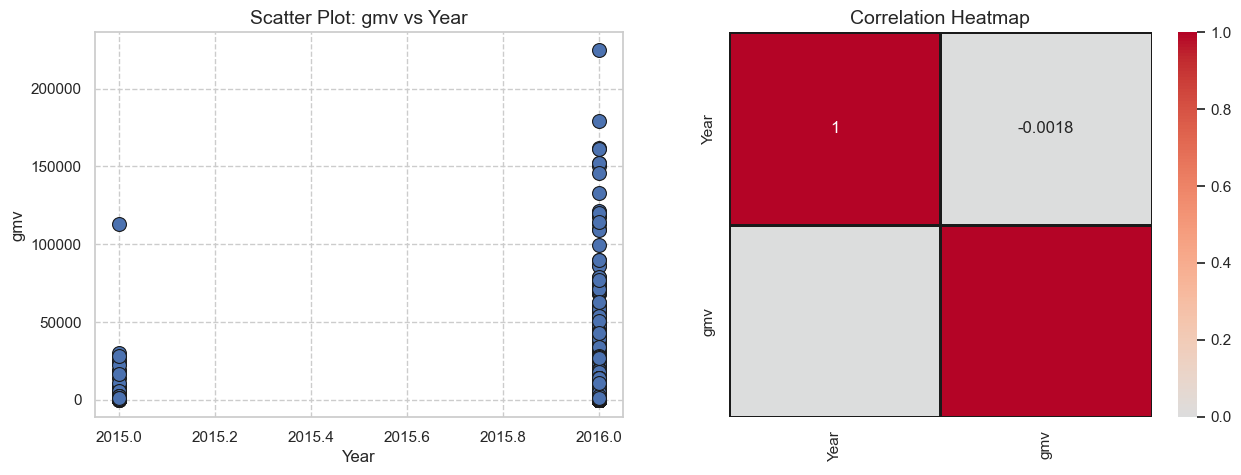

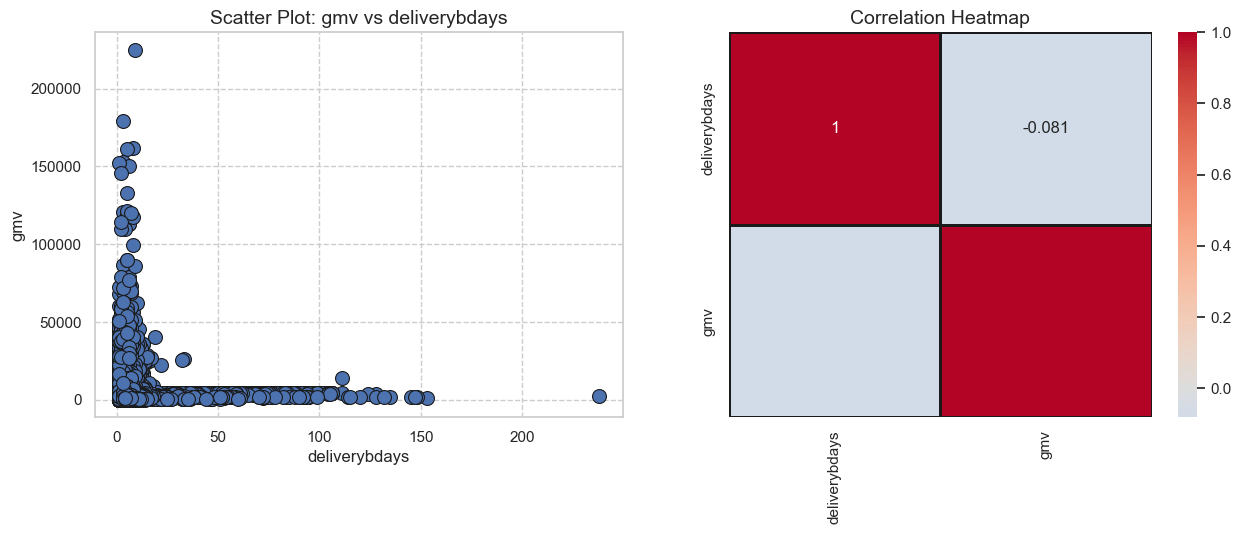

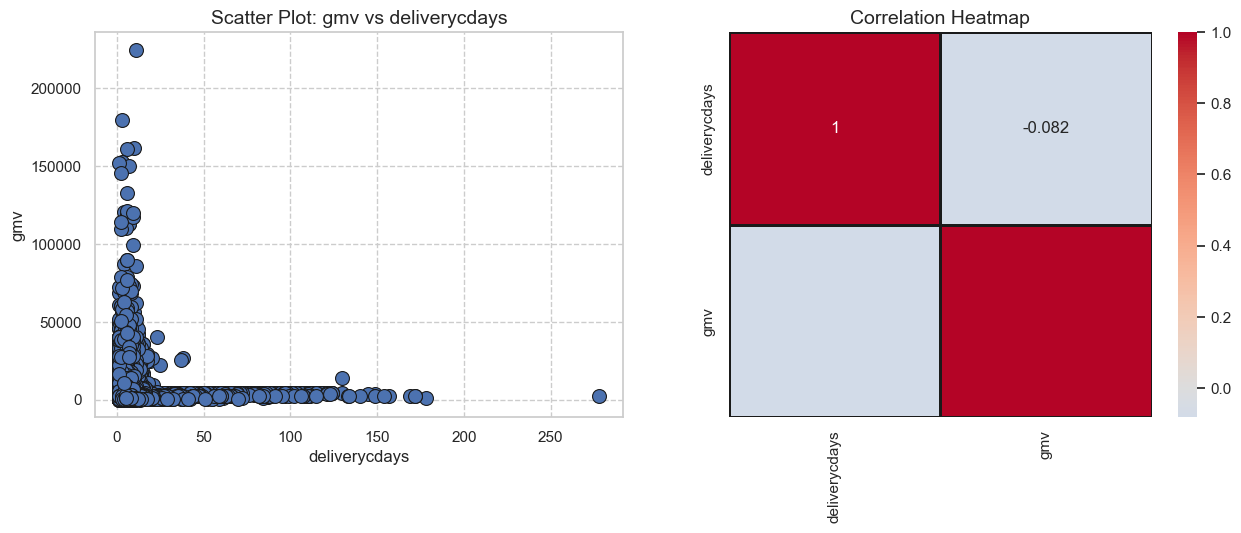

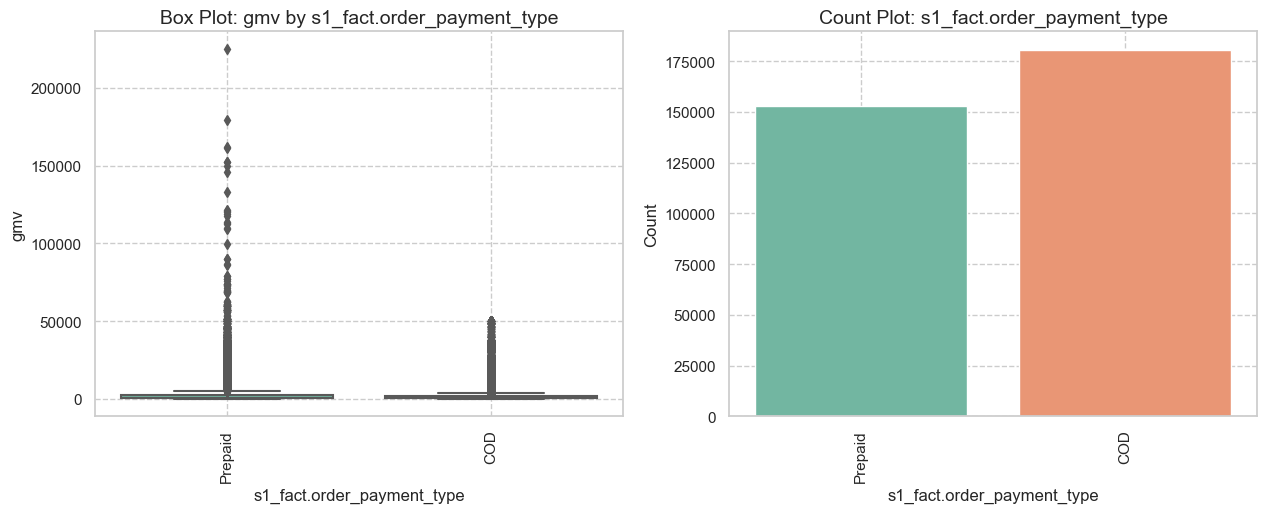

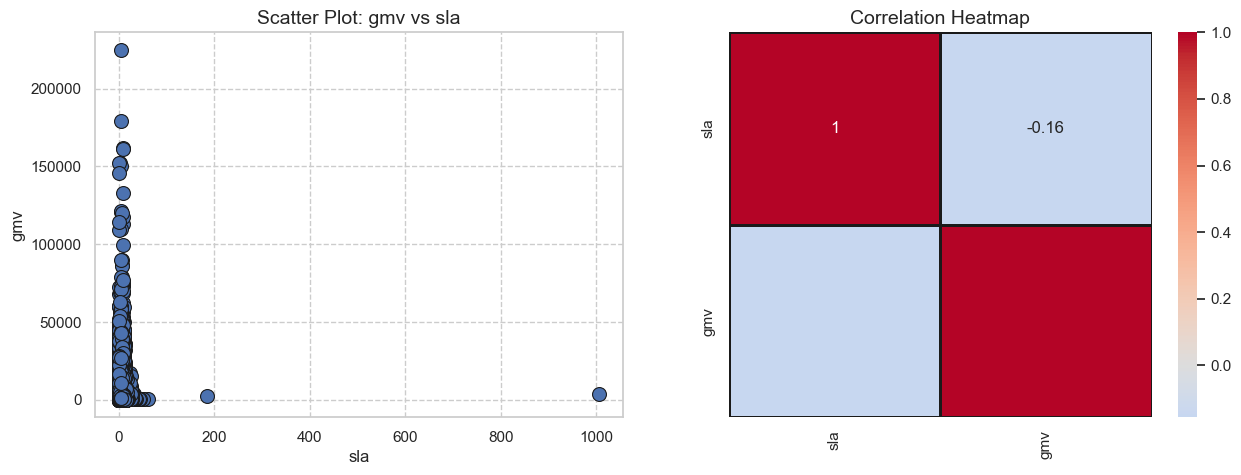

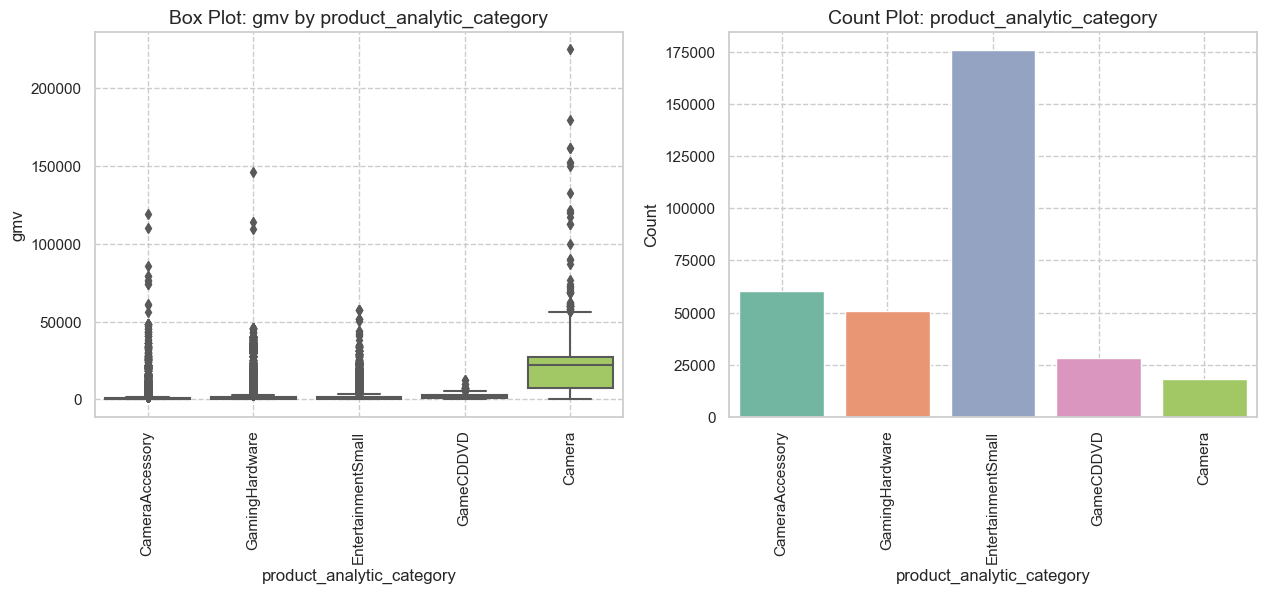

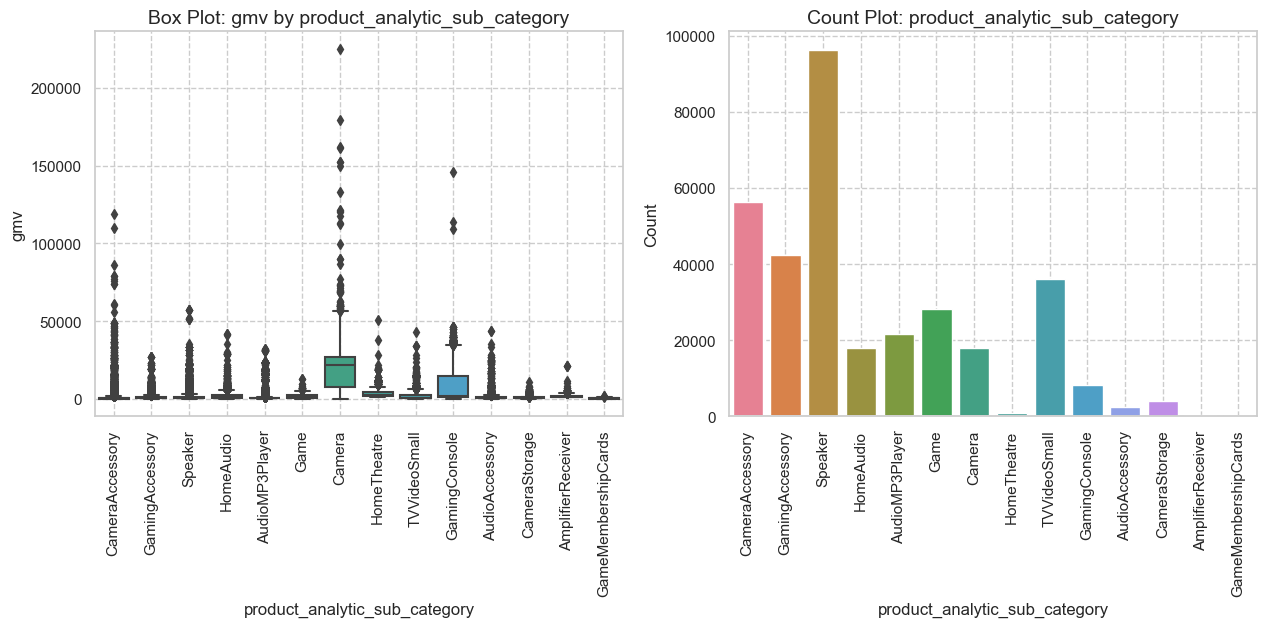

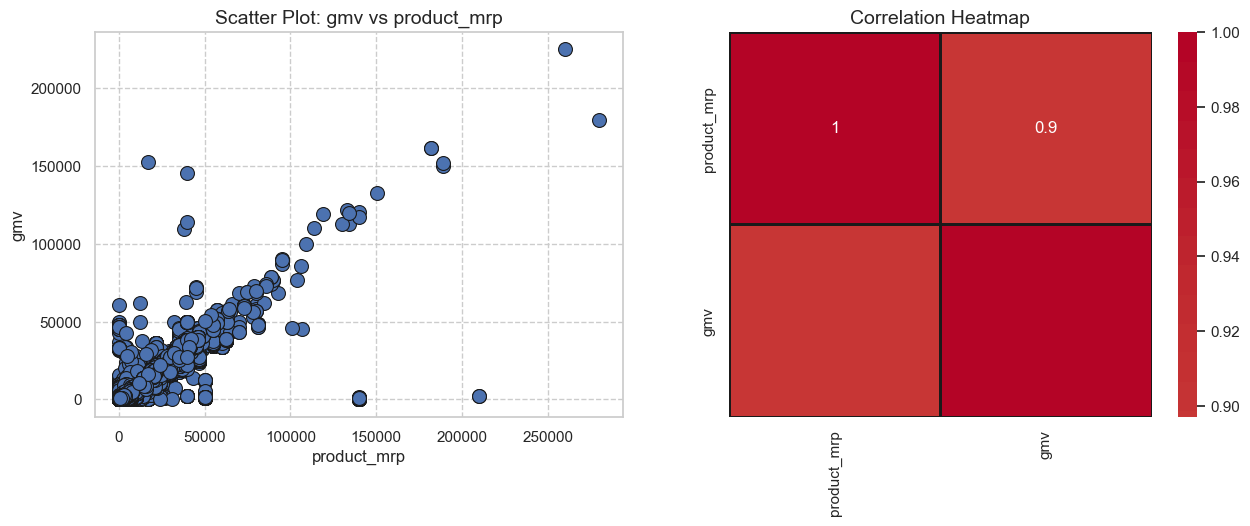

In [25]:
# Bi-variate Analysis

def comprehensive_bivariate_analysis(df, target_col, exclude_cols=None):
    """
    Performs bivariate analysis of the specified target column against all other columns in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.
    target_col (str): The name of the target column for analysis.
    exclude_cols (list): List of columns to exclude from the analysis.

    Returns:
    None: Displays the plots for each bivariate analysis.
    """
    
    # Set appealing styles and color palettes for categorical plots
    sns.set(style="whitegrid")
    base_palette = sns.color_palette("Set2")  # Custom base color palette for vibrant colors

    # Validate that the target column exists in the DataFrame
    if target_col not in df.columns:
        print(f"Error: '{target_col}' not found in the DataFrame.")
        return

    # Get all columns except the target column and those in exclude_cols
    other_cols = df.columns[df.columns != target_col]
    if exclude_cols is not None:
        other_cols = other_cols[~other_cols.isin(exclude_cols)]

    for col in other_cols:
        plt.figure(figsize=(15, 5))

        # Scatter plot for numerical vs numerical
        if df[col].dtype in ['int64', 'float64'] and df[target_col].dtype in ['int64', 'float64']:
            plt.subplot(1, 2, 1)
            sns.scatterplot(data=df, x=col, y=target_col, marker='o', s=100, edgecolor='k')  # No palette or hue
            plt.title(f'Scatter Plot: {target_col} vs {col}', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel(target_col, fontsize=12)
            plt.grid(True, linestyle='--')

            # Correlation heatmap
            plt.subplot(1, 2, 2)
            sns.heatmap(df[[col, target_col]].corr(), annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='k')
            plt.title('Correlation Heatmap', fontsize=14)
            plt.xticks(rotation=90)
            plt.show()

        # Box plot for categorical vs numerical
        elif df[col].dtype == 'object' and df[target_col].dtype in ['int64', 'float64']:
            unique_vals = df[col].nunique()  # Get the number of unique values in the categorical column
            if unique_vals <= len(base_palette):
                custom_palette = sns.color_palette(base_palette[:unique_vals])  # Adjust palette size based on unique values
            else:
                custom_palette = sns.color_palette("husl", unique_vals)  # Use a larger palette if necessary

            plt.subplot(1, 2, 1)
            sns.boxplot(data=df, x=col, y=target_col, palette=custom_palette, hue=col, dodge=False)
            plt.title(f'Box Plot: {target_col} by {col}', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel(target_col, fontsize=12)
            plt.xticks(rotation=90)
            plt.grid(True, linestyle='--')
            plt.legend([],[], frameon=False)  # Remove redundant legend

            # Count plot for categorical variables
            plt.subplot(1, 2, 2)
            sns.countplot(data=df, x=col, palette=custom_palette, hue=col, dodge=False)
            plt.title(f'Count Plot: {col}', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt.grid(True, linestyle='--')
            plt.xticks(rotation=90)
            plt.legend([],[], frameon=False)  # Remove redundant legend
            plt.show()

        # Indicate unsupported data types
        else:
            print(f"Unsupported data types for the specified columns: {col} and {target_col}.")

# Example usage, excluding the 'product_analytic_vertical' column:
exclude_columns = ['product_analytic_vertical','order_item_id']
comprehensive_bivariate_analysis(ce_df, 'gmv', exclude_cols=exclude_columns)


In [26]:
ce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333405 entries, 706 to 1528801
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_date                     333405 non-null  datetime64[ns]
 1   Year                           333405 non-null  int64         
 2   order_item_id                  333405 non-null  float64       
 3   gmv                            333405 non-null  float64       
 4   deliverybdays                  333405 non-null  float64       
 5   deliverycdays                  333405 non-null  float64       
 6   s1_fact.order_payment_type     333405 non-null  object        
 7   sla                            333405 non-null  int64         
 8   product_analytic_category      333405 non-null  object        
 9   product_analytic_sub_category  333405 non-null  object        
 10  product_analytic_vertical      333405 non-null  object        
 1

In [27]:
# Loop through the columns with dtype=object and display value counts
for col in ce_df.select_dtypes(include=['object']).columns:
    print(f"Value counts for column: {col}")
    print(ce_df[col].value_counts())
    print("\n" + "="*40 + "\n")


Value counts for column: s1_fact.order_payment_type
COD        180662
Prepaid    152743
Name: s1_fact.order_payment_type, dtype: int64


Value counts for column: product_analytic_category
EntertainmentSmall    175876
CameraAccessory        60541
GamingHardware         50758
GameCDDVD              28153
Camera                 18077
Name: product_analytic_category, dtype: int64


Value counts for column: product_analytic_sub_category
Speaker                96324
CameraAccessory        56398
GamingAccessory        42480
TVVideoSmall           36048
Game                   28088
AudioMP3Player         21702
Camera                 18077
HomeAudio              17899
GamingConsole           8278
CameraStorage           4143
AudioAccessory          2563
HomeTheatre              892
AmplifierReceiver        448
GameMembershipCards       65
Name: product_analytic_sub_category, dtype: int64


Value counts for column: product_analytic_vertical
MobileSpeaker            60942
LaptopSpeaker           

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming ce_df is your original DataFrame
# Split the data into training and testing sets
X = ce_df.drop(columns='gmv')  # Features
y = ce_df['gmv']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create copies for encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Log transform the target variable in the training set
y_train_log = np.log1p(y_train)  # Apply log transformation to the training target
# You can log-transform the test set if needed for analysis, but typically you would keep the original values for prediction
y_test_log = np.log1p(y_test)  # Optional: apply log transform for analysis

# Identify categorical columns except for 'product_analytic_vertical'
categorical_cols = X_train_encoded.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('product_analytic_vertical')

# Apply Label Encoding to all categorical columns except 'product_analytic_vertical'
label_encoder = LabelEncoder()
for col in categorical_cols:
    X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])
    # Apply the same transformation to the test set
    X_test_encoded[col] = label_encoder.transform(X_test[col])

# Apply Target Encoding to 'product_analytic_vertical'
target_encoder = TargetEncoder()
X_train_encoded['product_analytic_vertical'] = target_encoder.fit_transform(
    X_train_encoded['product_analytic_vertical'], 
    y_train_log  # Use the log-transformed training target variable for encoding
)

# Apply Target Encoding to the test set using the same encoder
X_test_encoded['product_analytic_vertical'] = target_encoder.transform(X_test_encoded['product_analytic_vertical'])

# Display the transformed training and testing DataFrames
print("Transformed Training Set:")
X_train_encoded.head()


Transformed Training Set:


,order_date,Year,order_item_id,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp
1270012,2016-06-18 11:00:03,2016,2.630825e+15,4.0,5.0,0,6,1,5,6.543377,1199
949904,2016-04-29 19:23:17,2016,1.587932e+15,6.0,7.0,0,7,1,4,6.657719,2990
1045205,2016-04-08 15:22:07,2016,3.000373e+17,6.0,7.0,1,6,2,10,6.734265,1299
1149959,2016-05-15 22:09:42,2016,4.601853e+15,7.0,8.0,0,7,1,4,6.195602,1050
949453,2016-04-08 19:29:33,2016,3.569787e+15,4.0,5.0,1,5,2,10,7.631874,3650


In [29]:
print("\nTransformed Testing Set:")
X_test_encoded.head()


Transformed Testing Set:


,order_date,Year,order_item_id,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp
1164546,2016-05-01 16:03:54,2016,1.589535e+15,4.0,4.0,0,7,1,4,6.195602,1499
1194374,2016-05-24 19:01:38,2016,1.609517e+15,5.0,6.0,0,5,1,4,5.510070,299
1216887,2016-05-25 18:19:21,2016,2.610354e+15,3.0,4.0,1,3,2,13,7.811371,4999
1131440,2016-05-21 17:00:41,2016,3.606777e+15,6.0,8.0,0,9,2,12,6.777722,1299
1149578,2016-05-28 23:45:31,2016,4.613146e+15,6.0,8.0,0,9,4,8,6.262994,799


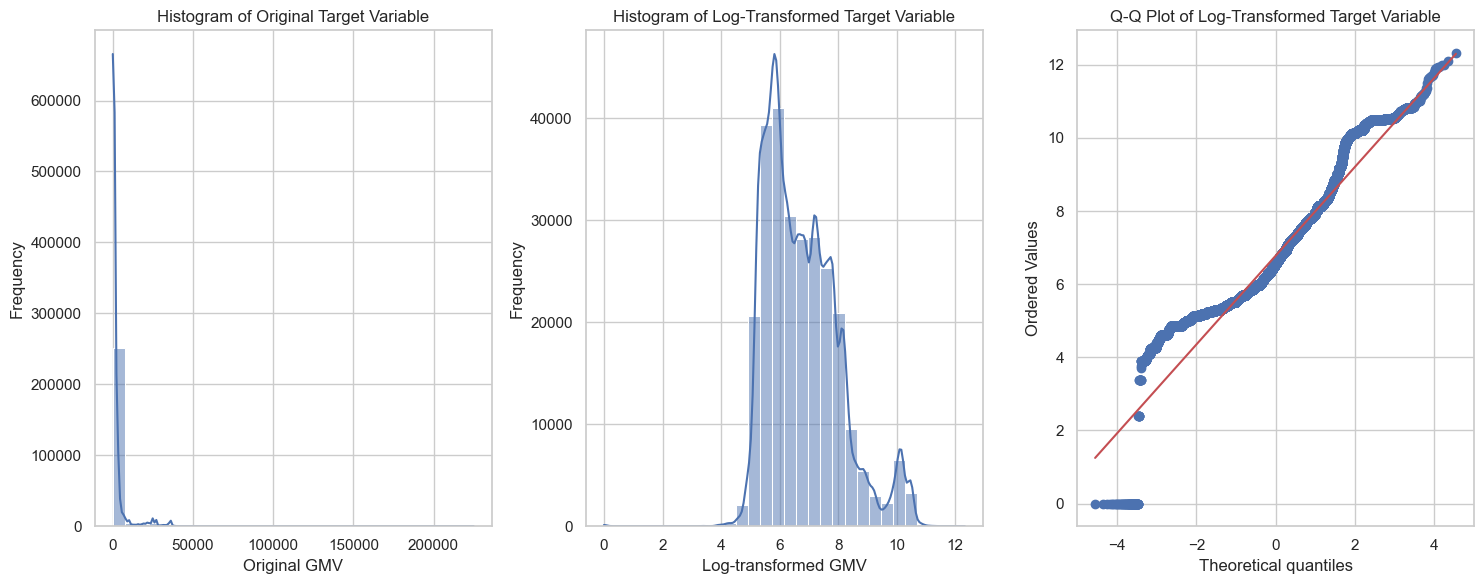

Shapiro-Wilk Test Statistic: 0.9384955763816833
Shapiro-Wilk Test p-value: 0.0
Reject the null hypothesis - data is not normally distributed


c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [30]:
from scipy import stats

# Assuming y_train is your original target variable
# Visualization: Histogram
plt.figure(figsize=(15, 6))

# Original Distribution
plt.subplot(1, 3, 1)
sns.histplot(y_train, bins=30, kde=True)
plt.title('Histogram of Original Target Variable')
plt.xlabel('Original GMV')
plt.ylabel('Frequency')

# Log-Transformed Distribution
plt.subplot(1, 3, 2)
sns.histplot(y_train_log, bins=30, kde=True)
plt.title('Histogram of Log-Transformed Target Variable')
plt.xlabel('Log-transformed GMV')
plt.ylabel('Frequency')

# Q-Q Plot for Log-Transformed
plt.subplot(1, 3, 3)
stats.probplot(y_train_log, dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Target Variable')

plt.tight_layout()
plt.show()

# Statistical Test: Shapiro-Wilk Test for Log-Transformed
shapiro_stat, shapiro_p = stats.shapiro(y_train_log)
print('Shapiro-Wilk Test Statistic:', shapiro_stat)
print('Shapiro-Wilk Test p-value:', shapiro_p)

# Interpretation
alpha = 0.05
if shapiro_p > alpha:
    print("Fail to reject the null hypothesis - data is normally distributed")
else:
    print("Reject the null hypothesis - data is not normally distributed")


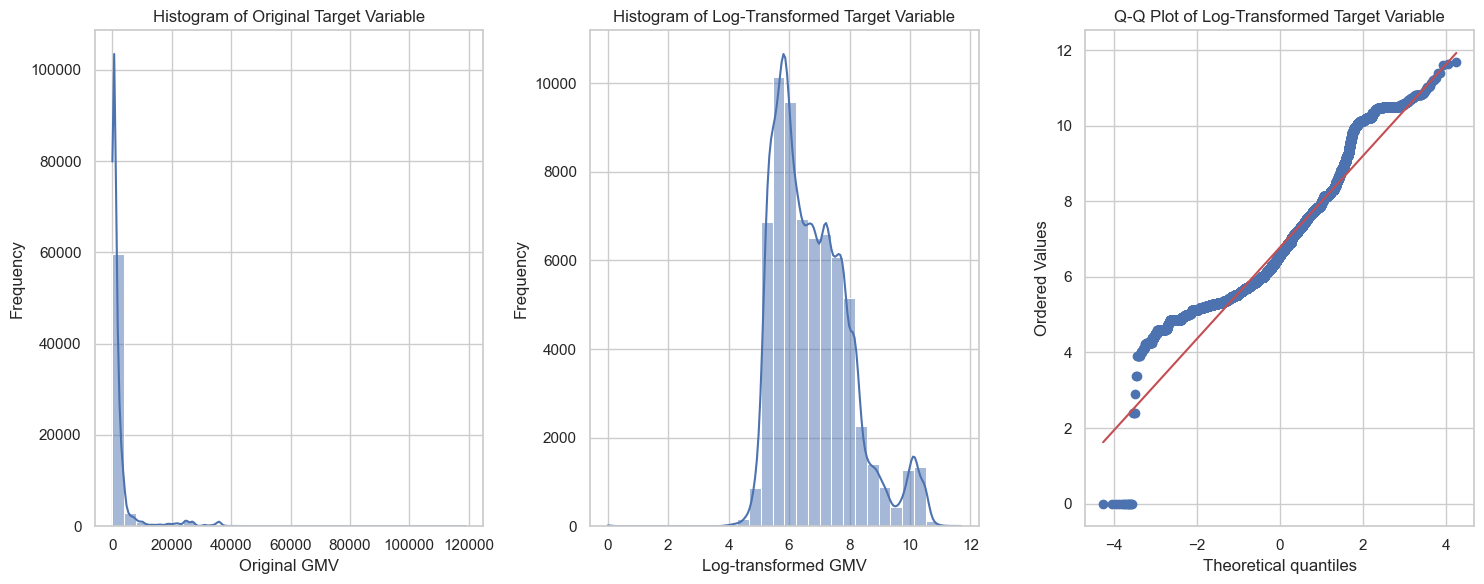

Shapiro-Wilk Test Statistic: 0.9378629326820374
Shapiro-Wilk Test p-value: 0.0
Reject the null hypothesis - data is not normally distributed


c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
# Assuming y_train is your original target variable
# Visualization: Histogram
plt.figure(figsize=(15, 6))

# Original Distribution
plt.subplot(1, 3, 1)
sns.histplot(y_test, bins=30, kde=True)
plt.title('Histogram of Original Target Variable')
plt.xlabel('Original GMV')
plt.ylabel('Frequency')

# Log-Transformed Distribution
plt.subplot(1, 3, 2)
sns.histplot(y_test_log, bins=30, kde=True)
plt.title('Histogram of Log-Transformed Target Variable')
plt.xlabel('Log-transformed GMV')
plt.ylabel('Frequency')

# Q-Q Plot for Log-Transformed
plt.subplot(1, 3, 3)
stats.probplot(y_test_log, dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Target Variable')

plt.tight_layout()
plt.show()

# Statistical Test: Shapiro-Wilk Test for Log-Transformed
shapiro_stat, shapiro_p = stats.shapiro(y_test_log)
print('Shapiro-Wilk Test Statistic:', shapiro_stat)
print('Shapiro-Wilk Test p-value:', shapiro_p)

# Interpretation
alpha = 0.05
if shapiro_p > alpha:
    print("Fail to reject the null hypothesis - data is normally distributed")
else:
    print("Reject the null hypothesis - data is not normally distributed")

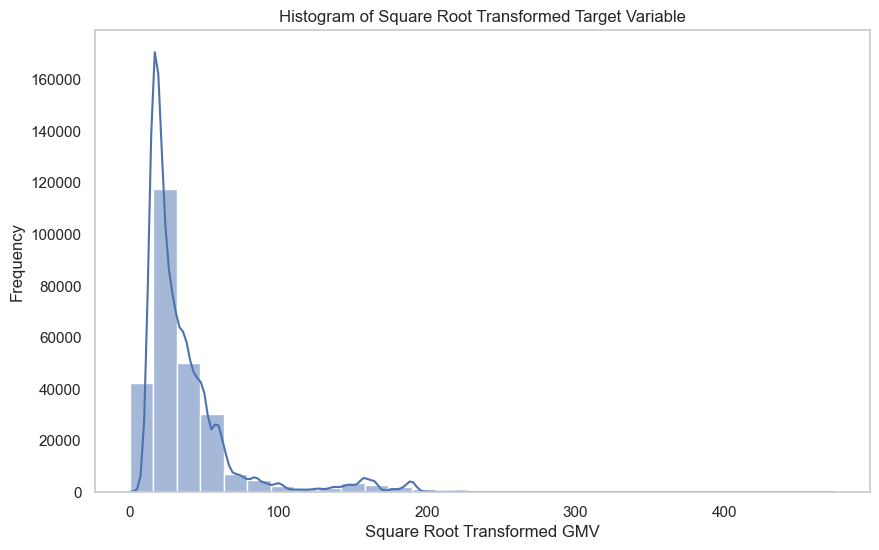

Shapiro-Wilk Test Statistic (Square Root): 0.6665618419647217
Shapiro-Wilk Test p-value (Square Root): 0.0


c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming y_train_log is your log-transformed target variable
# Apply Square Root Transformation
y_train_sqrt = np.sqrt(y_train)

# Plotting the histogram of the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(y_train_sqrt, bins=30, kde=True)
plt.title('Histogram of Square Root Transformed Target Variable')
plt.xlabel('Square Root Transformed GMV')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Shapiro-Wilk Test
shapiro_stat_sqrt, p_value_sqrt = stats.shapiro(y_train_sqrt)
print(f"Shapiro-Wilk Test Statistic (Square Root): {shapiro_stat_sqrt}")
print(f"Shapiro-Wilk Test p-value (Square Root): {p_value_sqrt}")


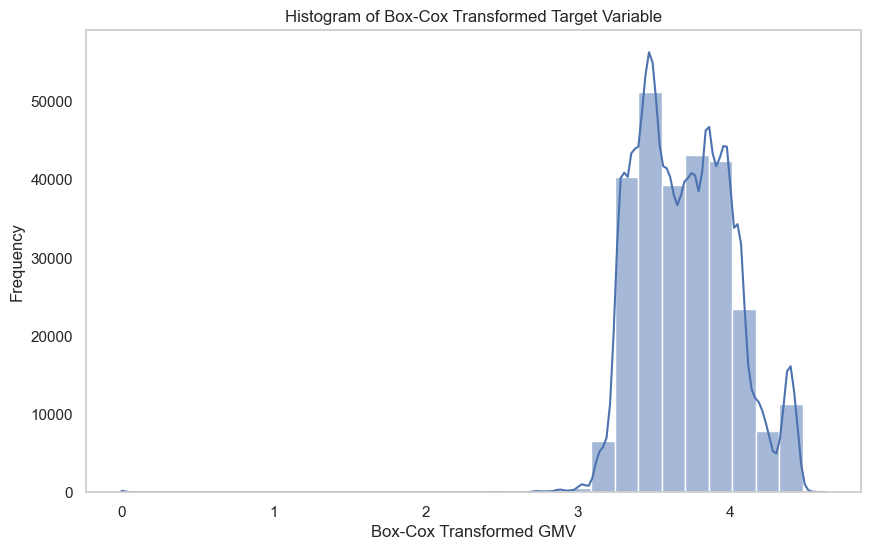

Shapiro-Wilk Test Statistic (Box-Cox): 0.9601790904998779
Shapiro-Wilk Test p-value (Box-Cox): 0.0


c:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
# Box-Cox Transformation
# Ensure all values are positive
y_train_positive = y_train - y_train.min() + 1  # Shift the data to be positive

# Applying Box-Cox Transformation
y_train_boxcox, lambda_boxcox = stats.boxcox(y_train_positive)

# Plotting the histogram of the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(y_train_boxcox, bins=30, kde=True)
plt.title('Histogram of Box-Cox Transformed Target Variable')
plt.xlabel('Box-Cox Transformed GMV')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Shapiro-Wilk Test
shapiro_stat_boxcox, p_value_boxcox = stats.shapiro(y_train_boxcox)
print(f"Shapiro-Wilk Test Statistic (Box-Cox): {shapiro_stat_boxcox}")
print(f"Shapiro-Wilk Test p-value (Box-Cox): {p_value_boxcox}")


In [34]:
# Example of Mann-Whitney U Test
from scipy.stats import mannwhitneyu

# Assume group1 and group2 are two samples from your dataset
# Replace with your actual data
group1 = y_train[y_train < 50]  # Replace with your condition
group2 = y_train[y_train >= 50]  # Replace with your condition

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)

print(f'Mann-Whitney U Test Statistic: {stat}')
print(f'Mann-Whitney U Test p-value: {p_value}')


Mann-Whitney U Test Statistic: 0.0
Mann-Whitney U Test p-value: 1.1016504732583842e-90


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

# Assuming ce_df is your original DataFrame
# Split the data into training and testing sets
X = ce_df.drop(columns='gmv')  # Features
y = ce_df['gmv']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create copies for encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Log transform the target variable in the training set
y_train_log = np.log1p(y_train)  # Apply log transformation to the training target

# Identify categorical columns except for 'product_analytic_vertical'
categorical_cols = X_train_encoded.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('product_analytic_vertical')

# Apply Label Encoding to all categorical columns except 'product_analytic_vertical'
label_encoder = LabelEncoder()
for col in categorical_cols:
    X_train_encoded[col] = label_encoder.fit_transform(X_train_encoded[col])
    # Apply the same transformation to the test set
    X_test_encoded[col] = label_encoder.transform(X_test[col])

# Apply Target Encoding to 'product_analytic_vertical'
target_encoder = TargetEncoder()
X_train_encoded['product_analytic_vertical'] = target_encoder.fit_transform(
    X_train_encoded['product_analytic_vertical'], 
    y_train_log  # Use the log-transformed training target variable for encoding
)

# Apply Target Encoding to the test set using the same encoder
X_test_encoded['product_analytic_vertical'] = target_encoder.transform(X_test_encoded['product_analytic_vertical'])

# Convert any datetime columns to numeric (Unix timestamps)
for col in X_train_encoded.select_dtypes(include=['datetime64[ns]']).columns:
    X_train_encoded[col] = X_train_encoded[col].astype(np.int64) // 10**9  # Convert to seconds

for col in X_test_encoded.select_dtypes(include=['datetime64[ns]']).columns:
    X_test_encoded[col] = X_test_encoded[col].astype(np.int64) // 10**9  # Convert to seconds

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Select numeric columns for normalization
numeric_cols = X_train_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Normalize the training data (fit and transform) on numeric columns only
X_train_normalized = X_train_encoded.copy()
X_train_normalized[numeric_cols] = minmax_scaler.fit_transform(X_train_encoded[numeric_cols])

# Normalize the test data (only transform)
X_test_normalized = X_test_encoded.copy()
X_test_normalized[numeric_cols] = minmax_scaler.transform(X_test_encoded[numeric_cols])

# Display the normalized training and testing DataFrames
print("Normalized Training Set:")
X_train_normalized.head()



Normalized Training Set:


,order_date,Year,order_item_id,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp
1270012,0.906054,1.0,0.008768,0.012658,0.014440,0.0,0.005964,0.25,0.384615,0.234891,0.004282
949904,0.778600,1.0,0.005292,0.021097,0.021661,0.0,0.006958,0.25,0.307692,0.259033,0.010679
1045205,0.724263,1.0,1.000000,0.021097,0.021661,1.0,0.005964,0.50,0.769231,0.275195,0.004639
1149959,0.819969,1.0,0.015338,0.025316,0.025271,0.0,0.006958,0.25,0.307692,0.161461,0.003750
949453,0.724704,1.0,0.011898,0.012658,0.014440,1.0,0.004970,0.50,0.769231,0.464719,0.013036


In [36]:

print("\nNormalized Testing Set:")
X_test_normalized.head()


Normalized Testing Set:


,order_date,Year,order_item_id,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp
1164546,0.783379,1.0,0.005298,0.012658,0.010830,0.0,0.006958,0.25,0.307692,0.161461,0.005354
1194374,0.842737,1.0,0.005364,0.016878,0.018051,0.0,0.004970,0.25,0.307692,0.016715,0.001068
1216887,0.845229,1.0,0.008700,0.008439,0.010830,1.0,0.002982,0.50,1.000000,0.502618,0.017854
1131440,0.834821,1.0,0.012021,0.021097,0.025271,0.0,0.008946,0.50,0.923077,0.284371,0.004639
1149578,0.853511,1.0,0.015375,0.021097,0.025271,0.0,0.008946,1.00,0.615385,0.175690,0.002854


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Random Forest Regressor model
model_ran = RandomForestRegressor(random_state=42)
model_ran.fit(X_train_normalized, y_train_log)

# Make predictions
y_pred_log = model_ran.predict(X_test_normalized)

# Inverse log transformation
y_pred = np.expm1(y_pred_log)  # Inverse of log1p
y_test = np.expm1(y_test_log)  # Inverse of log1p

# Check for infinite values
if np.any(np.isinf(y_pred)) or np.any(np.isinf(y_test)):
    print("Predictions or actual values contain infinity.")
else:
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)  # Use the inverse-transformed target for comparison
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate adjusted R²
    n = len(y_test)  # number of observations
    p = X_test_normalized.shape[1]  # number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R²: {r2}')
    print(f'Adjusted R²: {adjusted_r2}')

    # Optionally, check the ranges of predicted and actual values
    print("Predictions:")
    print(f"Max: {np.max(y_pred)}, Min: {np.min(y_pred)}")
    print("Actual Values (Inverse Transformed):")
    print(f"Max: {np.max(y_test)}, Min: {np.min(y_test)}")

MAE: 182.57799602549372
MSE: 712276.1768943656
R²: 0.9785186540539048
Adjusted R²: 0.9785151097558742
Predictions:
Max: 79972.01106715626, Min: 5.1521480241963555
Actual Values (Inverse Transformed):
Max: 118999.99999999993, Min: 0.0


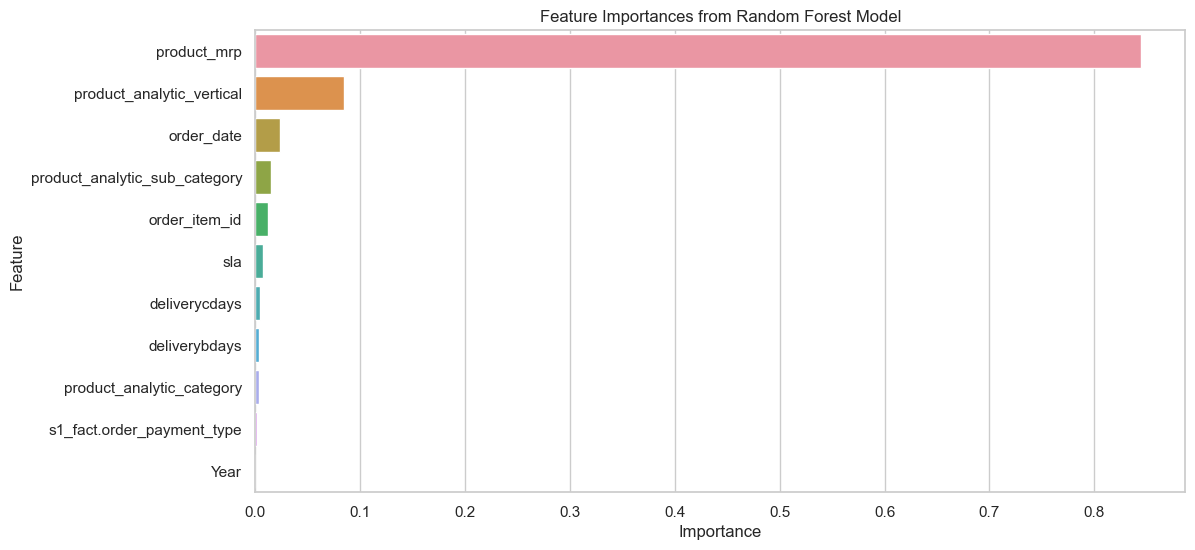

In [38]:
# Get feature importances from the model
feature_importances = model_ran.feature_importances_

# Use X_train_normalized's columns to get the correct feature names
features = X_train_normalized.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


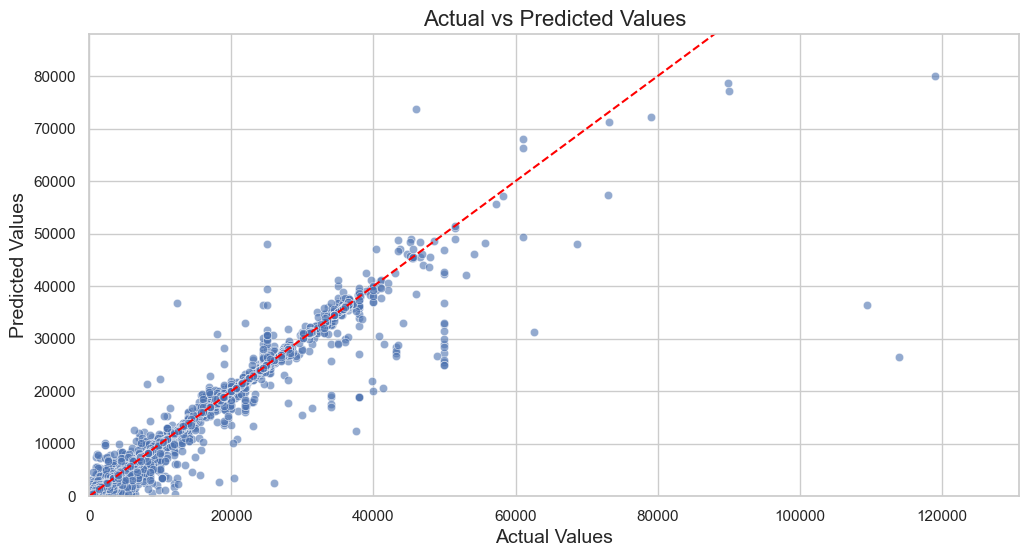

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inverse transform the actual test values
y_test = np.expm1(y_test_log)  # Inverse of log1p

# Set up the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Set labels and title
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xlim(0, y_test.max() * 1.1)  # Extend limits for better visualization
plt.ylim(0, y_pred.max() * 1.1)
plt.grid(True)
plt.show()


                   Date  Predicted_GMV
0   2016-07-26 01:19:45      2245.9325
1   2016-07-27 01:19:45       990.5700
2   2016-07-28 01:19:45       896.4500
3   2016-07-29 01:19:45      5599.8300
4   2016-07-30 01:19:45      1492.6400
..                  ...            ...
115 2016-11-18 01:19:45      6090.2900
116 2016-11-19 01:19:45      2522.4100
117 2016-11-20 01:19:45      2592.8100
118 2016-11-21 01:19:45      4391.8400
119 2016-11-22 01:19:45      3803.6500

[120 rows x 2 columns]


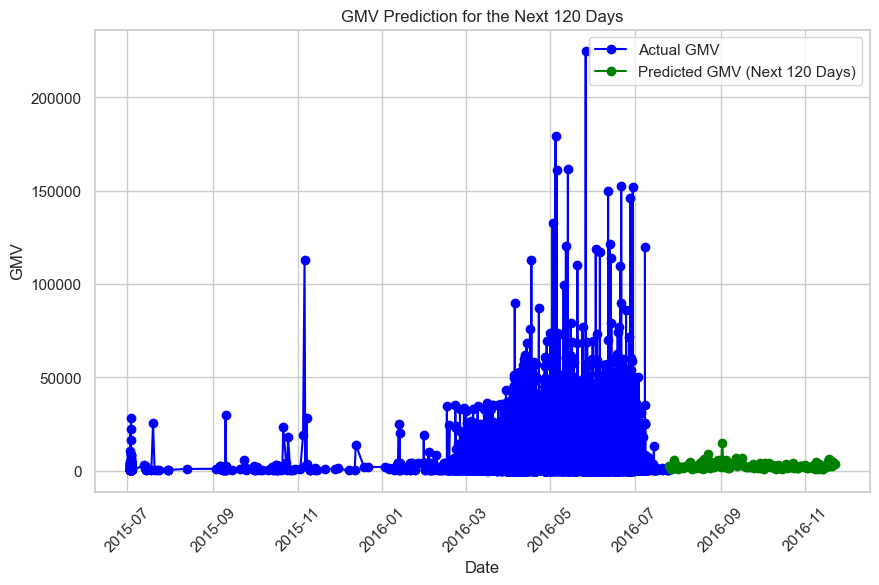

In [40]:
# Assuming ce_df is already available with 'order_date' and 'gmv'
ce_df['order_date'] = pd.to_datetime(ce_df['order_date'])

# Sort the data by 'order_date'
ce_df = ce_df.sort_values(by='order_date')

# Create lag features for time series forecasting
ce_df['gmv_lag1'] = ce_df['gmv'].shift(1)
ce_df['gmv_lag2'] = ce_df['gmv'].shift(2)
ce_df['gmv_lag3'] = ce_df['gmv'].shift(3)

# Drop rows with missing values after creating lag features
ce_df = ce_df.dropna()

# Prepare features and target
X = ce_df[['gmv_lag1', 'gmv_lag2', 'gmv_lag3']]
y = ce_df['gmv']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize RandomForestRegressor
rf_model = model_ran  # Assuming you already defined and trained model_ran earlier

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Dynamic days input
days_to_predict = int(input("Enter the number of days to predict (e.g., 30 or 60): "))

# Predict the next 'n' days of GMV
last_data = X_test.iloc[-1].values.reshape(1, -1)
future_preds = []
feature_names = X.columns

for _ in range(days_to_predict):
    # Convert last_data to DataFrame to include feature names
    last_data_df = pd.DataFrame(last_data, columns=feature_names)
    
    # Make the prediction
    pred = rf_model.predict(last_data_df)
    
    # Store the prediction
    future_preds.append(pred[0])
    
    # Update last_data by shifting and adding the new prediction
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = pred[0]

# Create a date range for the next 'n' days
future_dates = pd.date_range(ce_df['order_date'].max() + pd.Timedelta(days=1), periods=days_to_predict)

# Combine future dates and predictions into a DataFrame
future_gmv_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_GMV': future_preds
})

# Display future predictions in a DataFrame
print(future_gmv_df)


# Plot both present and future predicted GMV
plt.figure(figsize=(10, 6))

# Plot the actual GMV
plt.plot(ce_df['order_date'], ce_df['gmv'], label="Actual GMV", color='blue', marker='o')

# Plot the predicted GMV for future days
plt.plot(future_dates, future_preds, label=f"Predicted GMV (Next {days_to_predict} Days)", color='green', marker='o')

plt.xlabel('Date')
plt.ylabel('GMV')
plt.title(f'GMV Prediction for the Next {days_to_predict} Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [41]:
# Converting the data to Weekly Run
ce_df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333402 entries, 1424045 to 1243008
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   s1_fact.order_payment_type     333402 non-null  object
 1   product_analytic_category      333402 non-null  object
 2   product_analytic_sub_category  333402 non-null  object
 3   product_analytic_vertical      333402 non-null  object
dtypes: object(4)
memory usage: 12.7+ MB


In [81]:
# Filter the DataFrame for 2015
ce_df_2015 = ce_df[
    (ce_df['product_analytic_sub_category'].isin(['CameraAccessory', 'HomeAudio', 'GamingAccessory'])) &
    (ce_df['order_date'].dt.year == 2015)
]

# Filter the DataFrame for 2016
ce_df_2016 = ce_df[
    (ce_df['product_analytic_sub_category'].isin(['CameraAccessory', 'HomeAudio', 'GamingAccessory'])) &
    (ce_df['order_date'].dt.year == 2016)
]

# Count the occurrences of each subcategory in 2015
subcategory_counts_2015 = ce_df_2015['product_analytic_sub_category'].value_counts()
print("Subcategory counts for 2015:")
print(subcategory_counts_2015)

# Count the occurrences of each subcategory in 2016
subcategory_counts_2016 = ce_df_2016['product_analytic_sub_category'].value_counts()
print("\nSubcategory counts for 2016:")
print(subcategory_counts_2016)


Subcategory counts for 2015:
GamingAccessory    39
CameraAccessory    36
HomeAudio          25
Name: product_analytic_sub_category, dtype: int64

Subcategory counts for 2016:
CameraAccessory    56362
GamingAccessory    42441
HomeAudio          17874
Name: product_analytic_sub_category, dtype: int64


In [82]:
print(ce_df_2015.shape)
print(ce_df_2016.shape)

(100, 15)
(116677, 15)


In [83]:
# Combine 2015 and 2016 data into one DataFrame
ce_df_combined = pd.concat([ce_df_2015, ce_df_2016])
ce_df_combined.shape

(116777, 15)

In [84]:
ce_df_combined.columns

Index(['order_date', 'Year', 'order_item_id', 'gmv', 'deliverybdays',
       'deliverycdays', 's1_fact.order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'gmv_lag1', 'gmv_lag2',
       'gmv_lag3'],
      dtype='object')

In [85]:
# Drop specified columns from the DataFrame
ce_df_combined = ce_df_combined.drop(columns=['gmv_lag1', 'gmv_lag2', 'gmv_lag3'], errors='ignore')

# Optionally, check the shape of the DataFrame after dropping columns
print(ce_df_combined.shape)

(116777, 12)


In [86]:
ce_df_combined['week'] = ce_df_combined['order_date'].dt.to_period('W').apply(lambda r: r.start_time)

In [88]:
# Aggregation functions (same as before)
aggregation_functions = {
    'gmv': 'sum',  # Total GMV per week
    'order_item_id': 'nunique',  # Count unique order items per week
    'deliverybdays': 'mean',  # Average delivery business days
    'deliverycdays': 'mean',  # Average delivery calendar days
    's1_fact.order_payment_type': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent payment type
    'product_analytic_category': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent product category
    'product_analytic_sub_category': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent product sub-category
    'product_analytic_vertical': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent product vertical
    'product_mrp': 'mean',  # Average product MRP
}

In [89]:
ce_df_combined.isnull().sum()

order_date                       0
Year                             0
order_item_id                    0
gmv                              0
deliverybdays                    0
deliverycdays                    0
s1_fact.order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
week                             0
dtype: int64

In [90]:
# Group by 'week' and 'product_analytic_sub_category' for weekly aggregation
weekly_df = ce_df_combined.groupby(['week', 'product_analytic_sub_category']).agg({
    'gmv': 'sum',  # Total GMV per week
    'order_item_id': 'nunique',  # Count unique order items per week
    'deliverybdays': 'mean',  # Average delivery business days
    'deliverycdays': 'mean',  # Average delivery calendar days
    's1_fact.order_payment_type': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent payment type
    'product_mrp': 'mean'  # Average product MRP
}).reset_index()

# Check the shape and head of the aggregated DataFrame
print("Shape of the weekly DataFrame:", weekly_df.shape)
print("Head of the weekly DataFrame:")
print(weekly_df.head())


Shape of the weekly DataFrame: (103, 8)
Head of the weekly DataFrame:
        week product_analytic_sub_category      gmv  order_item_id  \
0 2015-06-29               CameraAccessory  14594.0             23   
1 2015-06-29               GamingAccessory  21391.0             19   
2 2015-06-29                     HomeAudio  51625.0             22   
3 2015-07-20               CameraAccessory    350.0              1   
4 2015-07-27               GamingAccessory   1200.0              1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  product_mrp  
0            1.0       1.043478                    Prepaid  1502.217391  
1            1.0       1.000000                    Prepaid  1363.578947  
2            1.0       1.000000                    Prepaid  5131.409091  
3           14.0      16.000000                    Prepaid   250.000000  
4            5.0       6.000000                    Prepaid   700.000000  


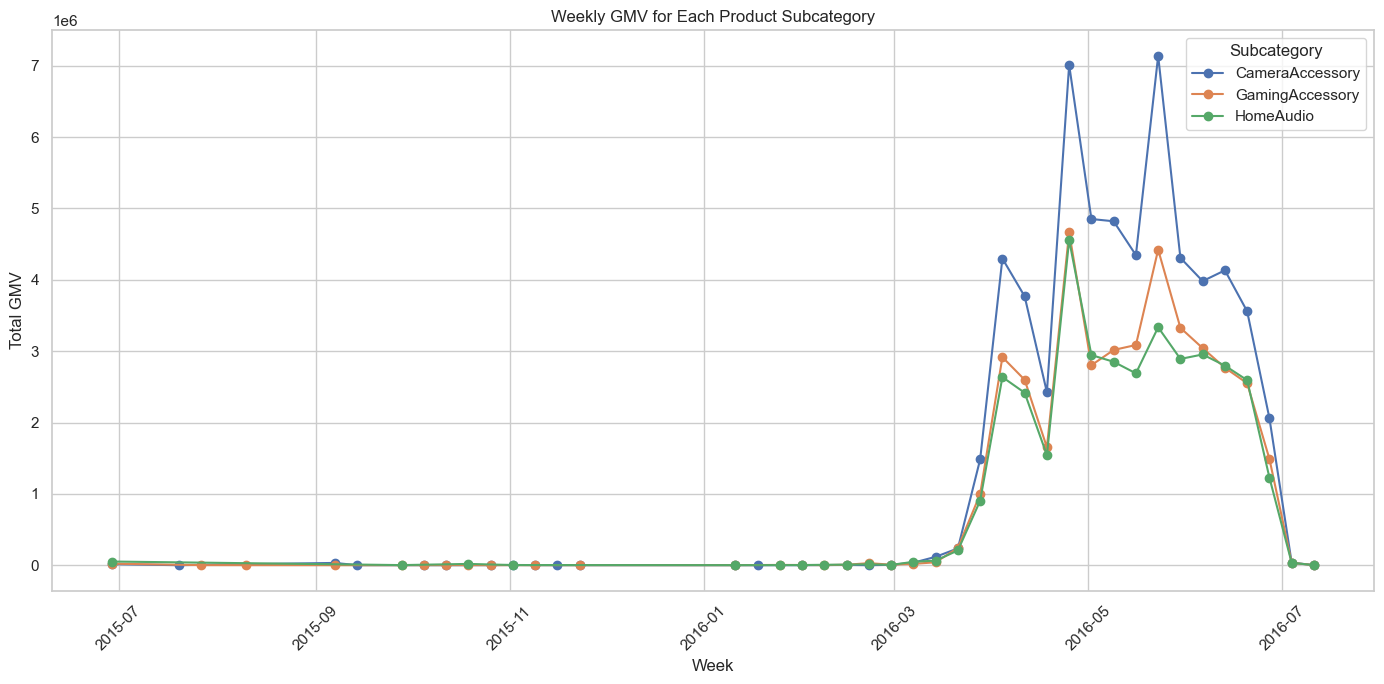

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting GMV over time for each subcategory
plt.figure(figsize=(14, 7))
for subcategory in weekly_df['product_analytic_sub_category'].unique():
    subcategory_data = weekly_df[weekly_df['product_analytic_sub_category'] == subcategory]
    plt.plot(subcategory_data['week'], subcategory_data['gmv'], marker='o', label=subcategory)

plt.title('Weekly GMV for Each Product Subcategory')
plt.xlabel('Week')
plt.ylabel('Total GMV')
plt.xticks(rotation=45)
plt.legend(title='Subcategory')
plt.tight_layout()
plt.show()


In [92]:
# Sort the DataFrame by week to ensure proper lagging
weekly_df.sort_values(by=['product_analytic_sub_category', 'week'], inplace=True)

# Create lag features for GMV
for lag in range(1, 4):  # Creating lag features for 1, 2, and 3 weeks
    weekly_df[f'gmv_lag{lag}'] = weekly_df.groupby('product_analytic_sub_category')['gmv'].shift(lag)

# Create rolling averages for GMV (e.g., 3-week rolling average)
weekly_df['gmv_rolling_avg'] = weekly_df.groupby('product_analytic_sub_category')['gmv'].transform(lambda x: x.rolling(window=3).mean())

# Check the updated DataFrame
print(weekly_df.head(10))


         week product_analytic_sub_category      gmv  order_item_id  \
0  2015-06-29               CameraAccessory  14594.0             23   
3  2015-07-20               CameraAccessory    350.0              1   
6  2015-09-07               CameraAccessory  32154.0              3   
8  2015-09-14               CameraAccessory    649.0              1   
11 2015-10-05               CameraAccessory    620.0              1   
13 2015-10-12               CameraAccessory    299.0              1   
17 2015-10-26               CameraAccessory   1169.0              2   
19 2015-11-02               CameraAccessory   3490.0              1   
21 2015-11-09               CameraAccessory   1499.0              1   
23 2015-11-16               CameraAccessory   1040.0              1   

    deliverybdays  deliverycdays s1_fact.order_payment_type   product_mrp  \
0        1.000000       1.043478                    Prepaid   1502.217391   
3       14.000000      16.000000                    Prepaid    2

In [93]:
# Fill NaN values created by lagging
weekly_df.fillna(0, inplace=True)

# Extract week number and month from 'week' for time progression
weekly_df['week_number'] = weekly_df['week'].dt.isocalendar().week
weekly_df['month'] = weekly_df['week'].dt.month


# Define features and target variable after adding new features
X = weekly_df.drop(columns=['gmv', 'week'])
y = weekly_df['gmv']

# Display the modified DataFrame
print(X.head())


   product_analytic_sub_category  order_item_id  deliverybdays  deliverycdays  \
0                CameraAccessory             23       1.000000       1.043478   
3                CameraAccessory              1      14.000000      16.000000   
6                CameraAccessory              3       4.333333       5.000000   
8                CameraAccessory              1      25.000000      29.000000   
11               CameraAccessory              1       7.000000       9.000000   

   s1_fact.order_payment_type   product_mrp  gmv_lag1  gmv_lag2  gmv_lag3  \
0                     Prepaid   1502.217391       0.0       0.0       0.0   
3                     Prepaid    250.000000   14594.0       0.0       0.0   
6                     Prepaid  12425.000000     350.0   14594.0       0.0   
8                     Prepaid   1299.000000   32154.0     350.0   14594.0   
11                    Prepaid   1200.000000     649.0   32154.0     350.0   

    gmv_rolling_avg  week_number  month  
0       

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Initialize label encoders
label_encoder_sub_category = LabelEncoder()
label_encoder_payment_type = LabelEncoder()

# Perform label encoding for 'product_analytic_sub_category' on training data
X_train['product_analytic_sub_category_encoded'] = label_encoder_sub_category.fit_transform(X_train['product_analytic_sub_category'])

# Transform test data using the same encoder
X_test['product_analytic_sub_category_encoded'] = label_encoder_sub_category.transform(X_test['product_analytic_sub_category'])

# Perform label encoding for 's1_fact.order_payment_type' on training data
X_train['s1_fact.order_payment_type_encoded'] = label_encoder_payment_type.fit_transform(X_train['s1_fact.order_payment_type'])

# Transform test data using the same encoder
X_test['s1_fact.order_payment_type_encoded'] = label_encoder_payment_type.transform(X_test['s1_fact.order_payment_type'])

# Now drop the original columns if needed
X_train.drop(columns=['product_analytic_sub_category', 's1_fact.order_payment_type'], inplace=True)
X_test.drop(columns=['product_analytic_sub_category', 's1_fact.order_payment_type'], inplace=True)

# Display the modified DataFrames
print("Training Set:")
print(X_train.head())
print("\nTesting Set:")
print(X_test.head())

Training Set:
    order_item_id  deliverybdays  deliverycdays  product_mrp   gmv_lag1  \
44             14       7.500000       8.857143  1062.571429    28751.0   
61           3672       4.340244       5.047940  1841.193573  4298664.0   
89           2905       4.704599       5.467942  1628.625042  3042576.0   
18              2       9.500000      11.000000   874.500000     1544.0   
90           1366       4.410388       5.116313  3050.960497  2953687.0   

        gmv_lag2      gmv_lag3  gmv_rolling_avg  week_number  month  \
44  7.034000e+03  1.240000e+03     1.439867e+04            9      2   
61  1.482308e+06  2.359040e+05     3.183178e+06           15      4   
89  3.327116e+06  4.422571e+06     3.045700e+06           24      6   
18  1.634000e+03  1.149000e+03     1.297667e+03           44     10   
90  2.891174e+06  3.334765e+06     2.880682e+06           24      6   

    product_analytic_sub_category_encoded  s1_fact.order_payment_type_encoded  
44                          

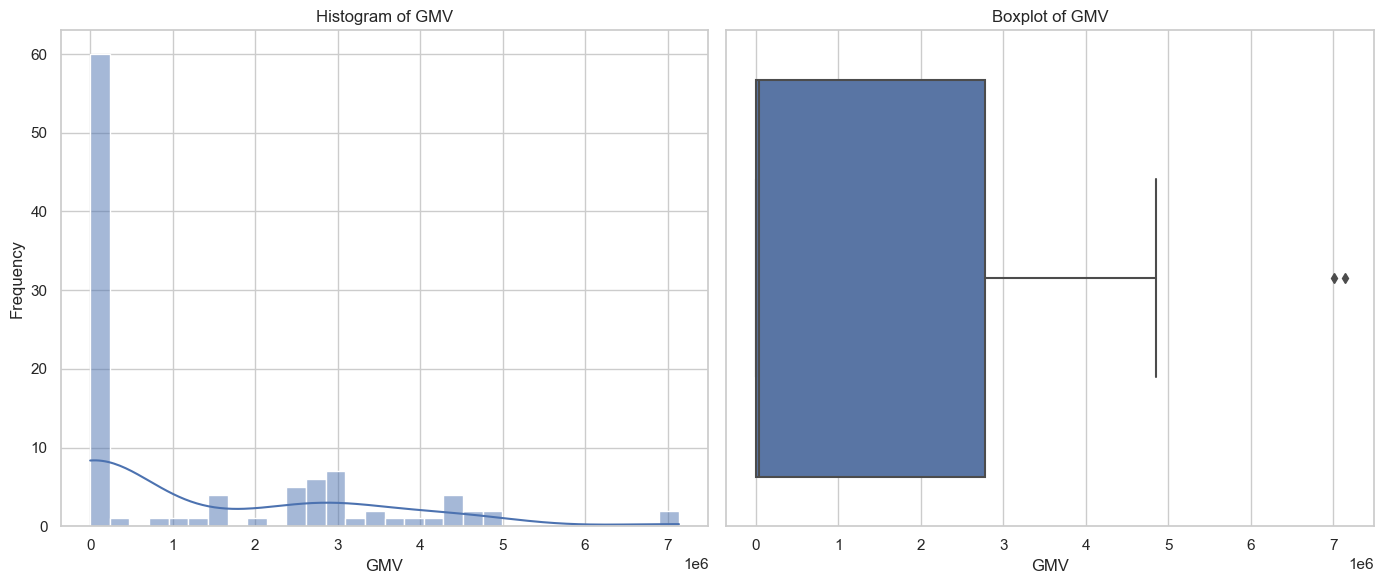

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(14, 6))

# Plot histogram
plt.subplot(1, 2, 1)
sns.histplot(weekly_df['gmv'], bins=30, kde=True)
plt.title('Histogram of GMV')
plt.xlabel('GMV')
plt.ylabel('Frequency')

# Plot boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=weekly_df['gmv'])
plt.title('Boxplot of GMV')
plt.xlabel('GMV')

# Show the plots
plt.tight_layout()
plt.show()


In [97]:
# Summary statistics
gmv_stats = weekly_df['gmv'].describe()
gmv_skewness = weekly_df['gmv'].skew()
gmv_kurtosis = weekly_df['gmv'].kurtosis()

# Print the summary statistics
print("Summary Statistics for GMV:")
print(gmv_stats)
print(f"\nSkewness: {gmv_skewness}")
print(f"Kurtosis: {gmv_kurtosis}")

Summary Statistics for GMV:
count    1.030000e+02
mean     1.313051e+06
std      1.788129e+06
min      2.680000e+02
25%      1.625000e+03
50%      3.522600e+04
75%      2.782296e+06
max      7.138625e+06
Name: gmv, dtype: float64

Skewness: 1.1644598508434707
Kurtosis: 0.5326113036771072


In [98]:
# Initialize the Random Forest model
rf_model =model_ran

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


MAE: 167517.59514722522
MSE: 77314755163.85725
R²: 0.9710241290983461


In [100]:
# Get feature importances
importances = model_ran.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)


                          Feature  Importance
0   product_analytic_sub_category    0.649052
7                        gmv_lag2    0.264991
4      s1_fact.order_payment_type    0.053830
3                   deliverycdays    0.008528
2                   deliverybdays    0.007857
1                   order_item_id    0.006306
8                        gmv_lag3    0.002861
5                     product_mrp    0.002700
6                        gmv_lag1    0.001676
10                    week_number    0.000934
9                 gmv_rolling_avg    0.000915
11                          month    0.000351


In [102]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model_ran, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


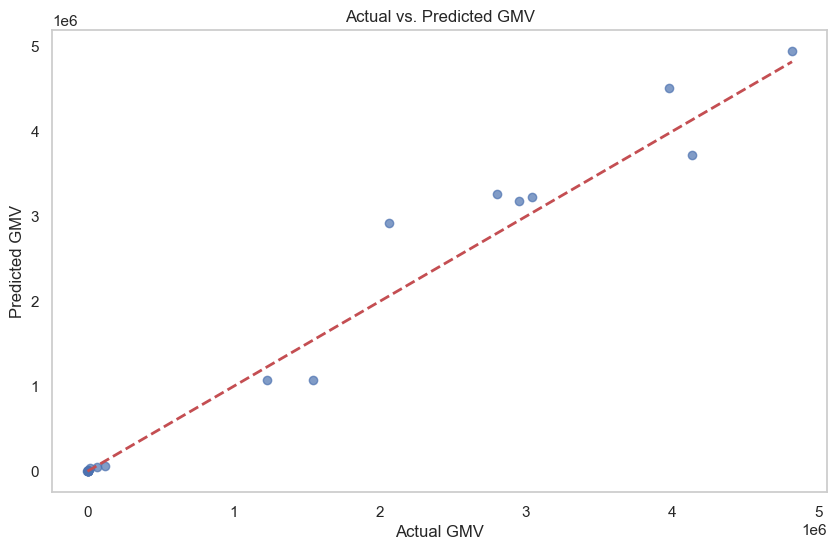

In [103]:
import matplotlib.pyplot as plt

# Predict using the best model
y_pred = best_model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted GMV')
plt.xlabel('Actual GMV')
plt.ylabel('Predicted GMV')
plt.grid()
plt.show()


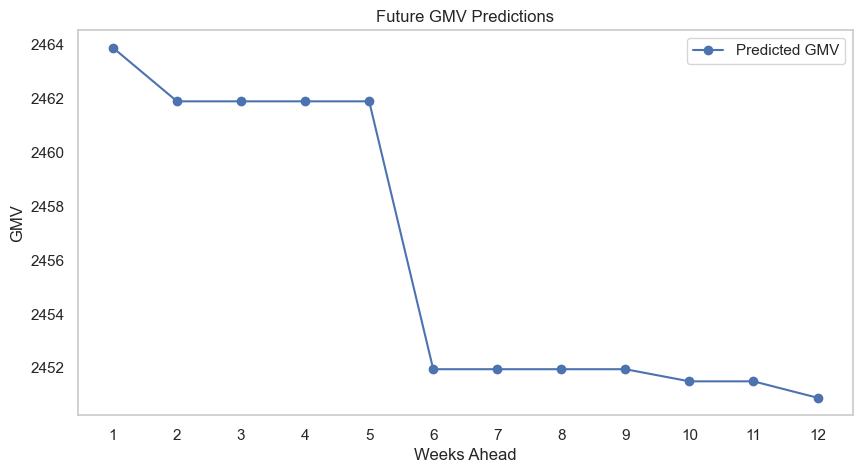

In [111]:
def predict_future_gmv(model, num_weeks, last_data_point, label_encoder, feature_names):
    # Create a list to hold future data
    future_data = []

    # Get the last week number and month from the last data point
    last_week_number = last_data_point['week_number']
    last_month = last_data_point['month']
    
    for i in range(1, num_weeks + 1):
        # Generate new week number and month
        new_week_number = last_week_number + i
        new_month = (last_month + (new_week_number // 52)) % 12 or 12  # Adjust for month

        # Prepare new input data
        new_data = {
            'week_number': new_week_number,
            'month': new_month,
            'product_analytic_sub_category_encoded': last_data_point['product_analytic_sub_category_encoded'],
            's1_fact.order_payment_type_encoded': last_data_point['s1_fact.order_payment_type_encoded'],
            'deliverybdays': last_data_point['deliverybdays'],  # Use the last known values
            'deliverycdays': last_data_point['deliverycdays'],  # Use the last known values
            'product_mrp': last_data_point['product_mrp'],  # Use the last known values
            # Add lag features if they were part of the model
            'gmv_lag1': last_data_point['gmv_lag1'], 
            'gmv_lag2': last_data_point['gmv_lag2'], 
            'gmv_lag3': last_data_point['gmv_lag3'],
            'gmv_rolling_avg': last_data_point['gmv_rolling_avg'],
            'order_item_id': last_data_point['order_item_id']  # Use the last known value
        }
        future_data.append(new_data)

    # Convert the future data to DataFrame
    future_df = pd.DataFrame(future_data)
    
    # Ensure future_df has the same feature names and order as X
    future_df = future_df[feature_names]
    
    # Make predictions
    future_predictions = model.predict(future_df)

    return future_predictions

# Get feature names used in the training model
feature_names = X.columns.tolist()

# Example usage
num_weeks_to_predict = 12  # You can get this from user input
last_data_point = X.iloc[-1]  # Get the last row of your features
future_predictions = predict_future_gmv(model_ran, num_weeks_to_predict, last_data_point, label_encoder, feature_names)

# Visualize the results
weeks = np.arange(1, num_weeks_to_predict + 1)
plt.figure(figsize=(10, 5))
plt.plot(weeks, future_predictions, marker='o', label='Predicted GMV')
plt.title('Future GMV Predictions')
plt.xlabel('Weeks Ahead')
plt.ylabel('GMV')
plt.xticks(weeks)
plt.legend()
plt.grid()
plt.show()
